<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 138.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 157.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 76.3 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-07-19 16:57:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  25.5MB/s    in 6.4s    

2025-07-19 16:57:30 (23.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


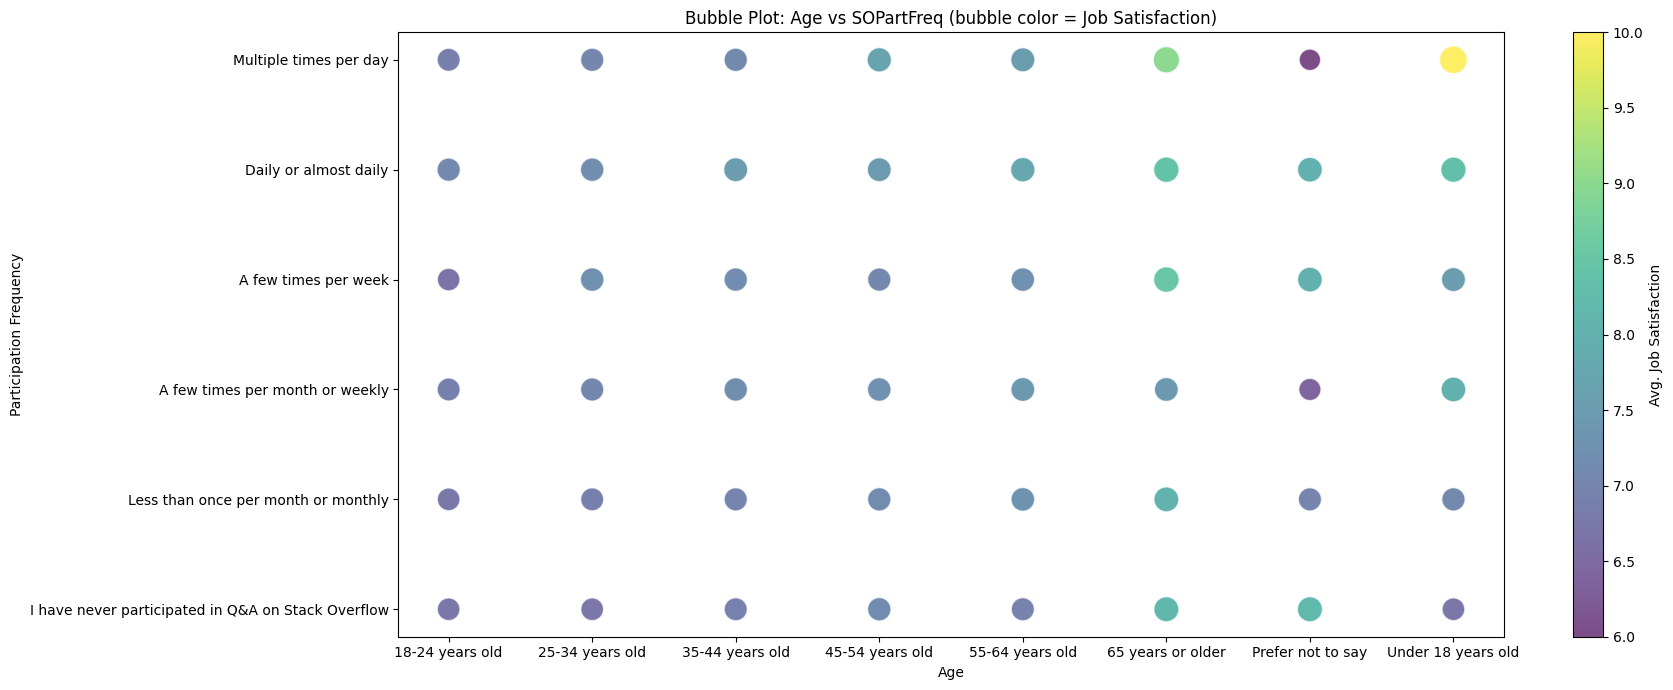

In [8]:
##Write your code here
agg_df = df.groupby(['Age', 'SOPartFreq']).agg(
    count=('Age', 'size'),
    avg_jobsat=('JobSat', 'mean')
).reset_index()

sopartfreq_order = [
    'I have never participated in Q&A on Stack Overflow',
    'Less than once per month or monthly',
    'A few times per month or weekly',
    'A few times per week',
    'Daily or almost daily',
    'Multiple times per day'
]

plt.figure(figsize=(18, 7))
scatter = plt.scatter(
    agg_df['Age'], 
    agg_df['SOPartFreq'].map({v: i for i, v in enumerate(sopartfreq_order)}), 
    s=agg_df['avg_jobsat']*40,
    c=agg_df['avg_jobsat'], cmap='viridis', alpha=0.7, edgecolors='w'
)

plt.yticks(range(len(sopartfreq_order)), sopartfreq_order)
plt.xlabel('Age')
plt.ylabel('Participation Frequency')
plt.title('Bubble Plot: Age vs SOPartFreq (bubble color = Job Satisfaction)')
plt.colorbar(scatter, label='Avg. Job Satisfaction')
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


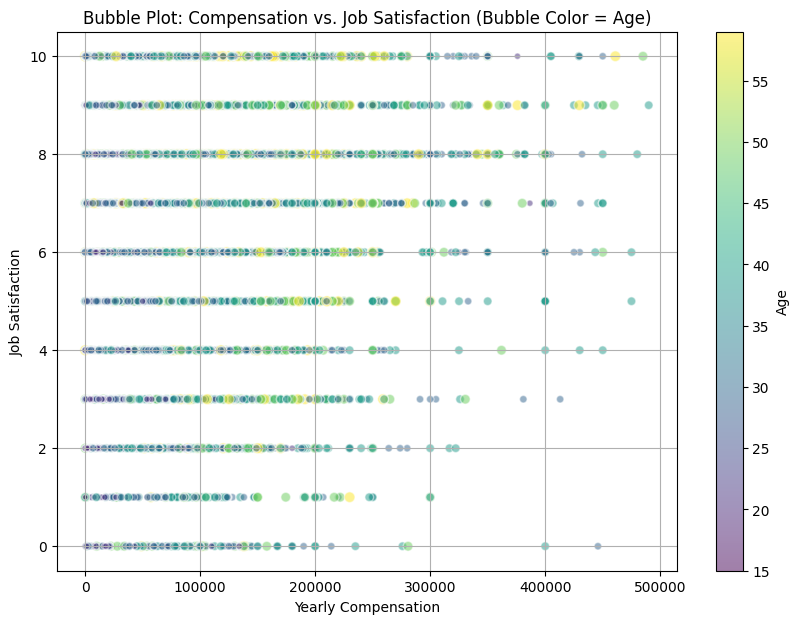

In [11]:
##Write your code here
def map_age_range(age_str):
    if pd.isnull(age_str):
        return None
    elif 'Under 18' in age_str:
        return 15
    elif '18-24' in age_str:
        return 21
    elif '25-34' in age_str:
        return 29
    elif '35-44' in age_str:
        return 39
    elif '45-54' in age_str:
        return 49
    elif '55-64' in age_str:
        return 59
    elif '65 or older' in age_str or '65+' in age_str:
        return 67
    else:
        return None
df['AgeNumeric'] = df['Age'].apply(map_age_range)

df_clean = df[['ConvertedCompYearly', 'JobSat', 'AgeNumeric']].dropna()
df_clean = df_clean[df_clean['ConvertedCompYearly'] < 500000]


plt.figure(figsize=(10, 7))
plt.scatter(
    df_clean['ConvertedCompYearly'],
    df_clean['JobSat'],
    s=df_clean['AgeNumeric'],
    alpha=0.5,
    c=df_clean['AgeNumeric'],
    cmap='viridis',
    edgecolors='w'
)
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble Color = Age)')
plt.colorbar(label='Age')
plt.grid(True)
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



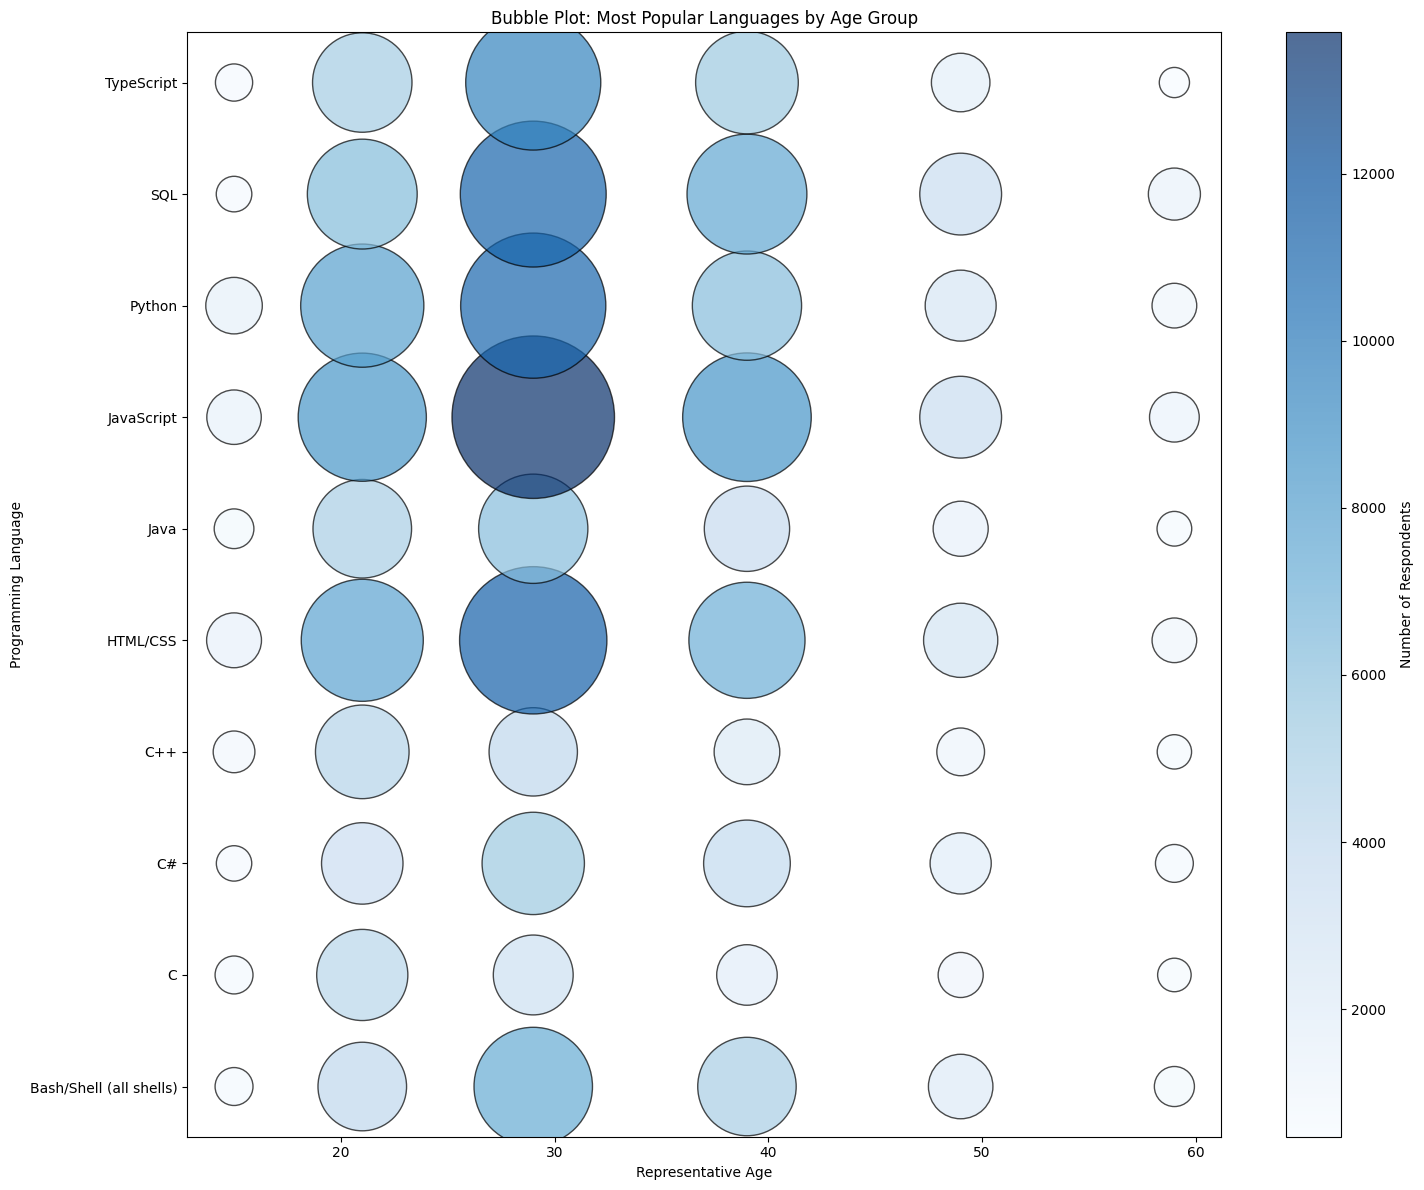

In [26]:
##Write your code here
def map_age_range(age_str):
    if pd.isnull(age_str):
        return None
    elif 'Under 18' in age_str:
        return 15
    elif '18-24' in age_str:
        return 21
    elif '25-34' in age_str:
        return 29
    elif '35-44' in age_str:
        return 39
    elif '45-54' in age_str:
        return 49
    elif '55-64' in age_str:
        return 59
    elif '65 or older' in age_str or '65+' in age_str:
        return 67
    else:
        return None

df['AgeNumeric'] = df['Age'].apply(map_age_range)

df_exploded = df.dropna(subset=['LanguageHaveWorkedWith']).copy()
df_exploded['Language'] = df_exploded['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_exploded.explode('Language')
lang_age_counts = df_exploded.groupby(['AgeNumeric', 'Language']).size().reset_index(name='Count')
top_languages = lang_age_counts.groupby('Language')['Count'].sum().nlargest(10).index
lang_age_counts = lang_age_counts[lang_age_counts['Language'].isin(top_languages)]

plt.figure(figsize=(15, 12))
scatter = plt.scatter(
    x=lang_age_counts['AgeNumeric'],
    y=lang_age_counts['Language'],
    s=lang_age_counts['Count'] ,
    c=lang_age_counts['Count'], cmap='Blues', alpha=0.7, edgecolors='k'
)
plt.xlabel('Representative Age')
plt.ylabel('Programming Language')
plt.title('Bubble Plot: Most Popular Languages by Age Group')
plt.colorbar(scatter, label='Number of Respondents')
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


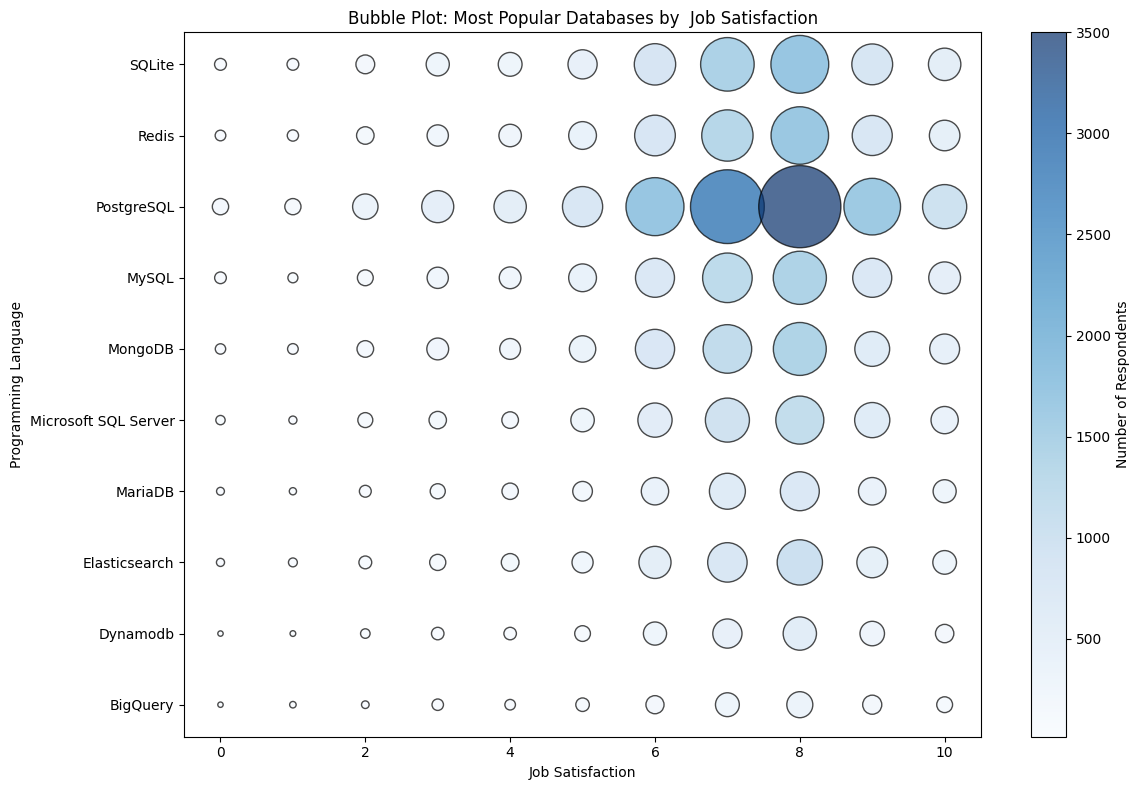

In [36]:
##Write your code here
df_exploded = df.dropna(subset=['DatabaseWantToWorkWith']).copy()
df_exploded['Database'] = df_exploded['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df_exploded.explode('Database')

db_age_counts = df_exploded.groupby(['JobSat', 'Database']).size().reset_index(name='Count')
top_databases = db_age_counts.groupby('Database')['Count'].sum().nlargest(10).index
db_age_counts = db_age_counts[db_age_counts['Database'].isin(top_databases)]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=db_age_counts['JobSat'],
    y=db_age_counts['Database'],
    s=db_age_counts['Count'] ,
    c=db_age_counts['Count'], cmap='Blues', alpha=0.7, edgecolors='k'
)
plt.xlabel('Job Satisfaction')
plt.ylabel('Programming Language')
plt.title('Bubble Plot: Most Popular Databases by  Job Satisfaction')
plt.colorbar(scatter, label='Number of Respondents')
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


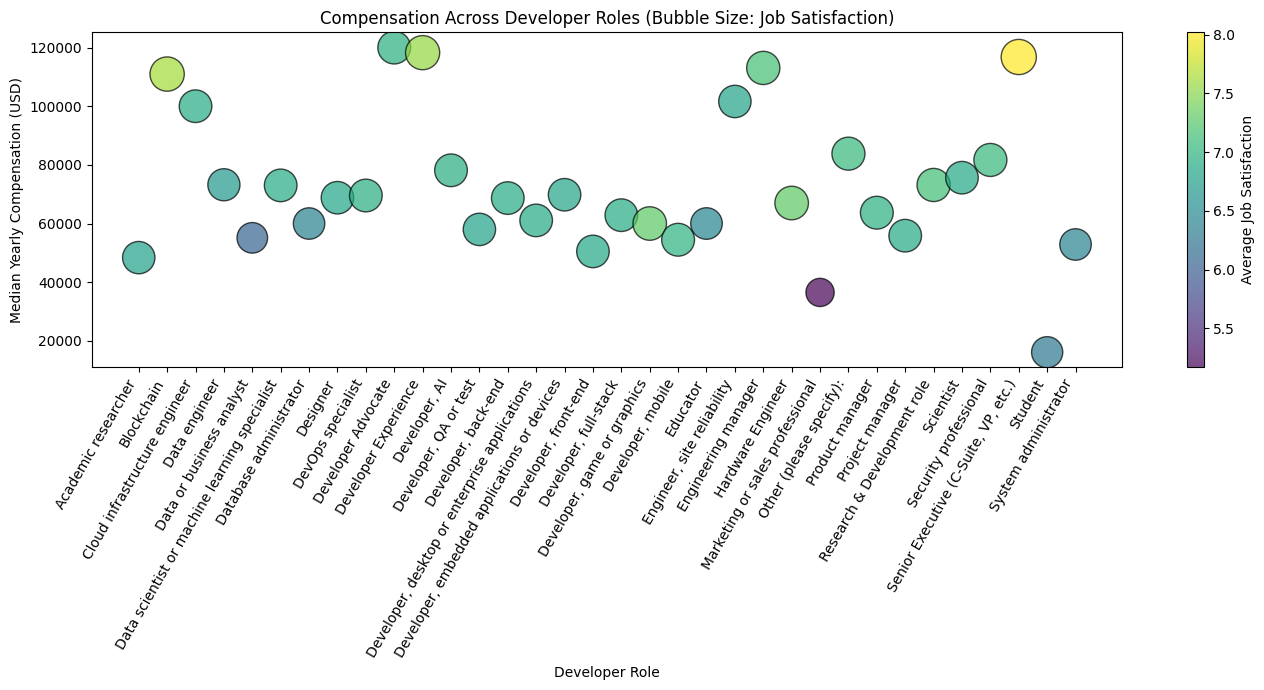

In [48]:
##Write your code here
df_exploded = df.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSat']).copy()
df_exploded['DevRole'] = df_exploded['DevType'].str.split(';')
df_exploded = df_exploded.explode('DevRole')
df_exploded['DevRole'] = df_exploded['DevRole'].str.strip()

role_comp = (df_exploded.groupby('DevRole').agg(MedianComp=('ConvertedCompYearly', 'median'),
                                                AvgJobSat=('JobSat', 'mean'),
                                                Count=('DevRole', 'size')).reset_index())


plt.figure(figsize=(14, 7))
scatter = plt.scatter(
    x=role_comp['DevRole'],
    y=role_comp['MedianComp'],
    s=role_comp['AvgJobSat']*80, 
    c=role_comp['AvgJobSat'], cmap='viridis', alpha=0.7, edgecolor='k'
)

plt.xticks(rotation=60, ha='right')
plt.xlabel('Developer Role')
plt.ylabel('Median Yearly Compensation (USD)')
plt.title('Compensation Across Developer Roles (Bubble Size: Job Satisfaction)')
plt.colorbar(scatter, label='Average Job Satisfaction')
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


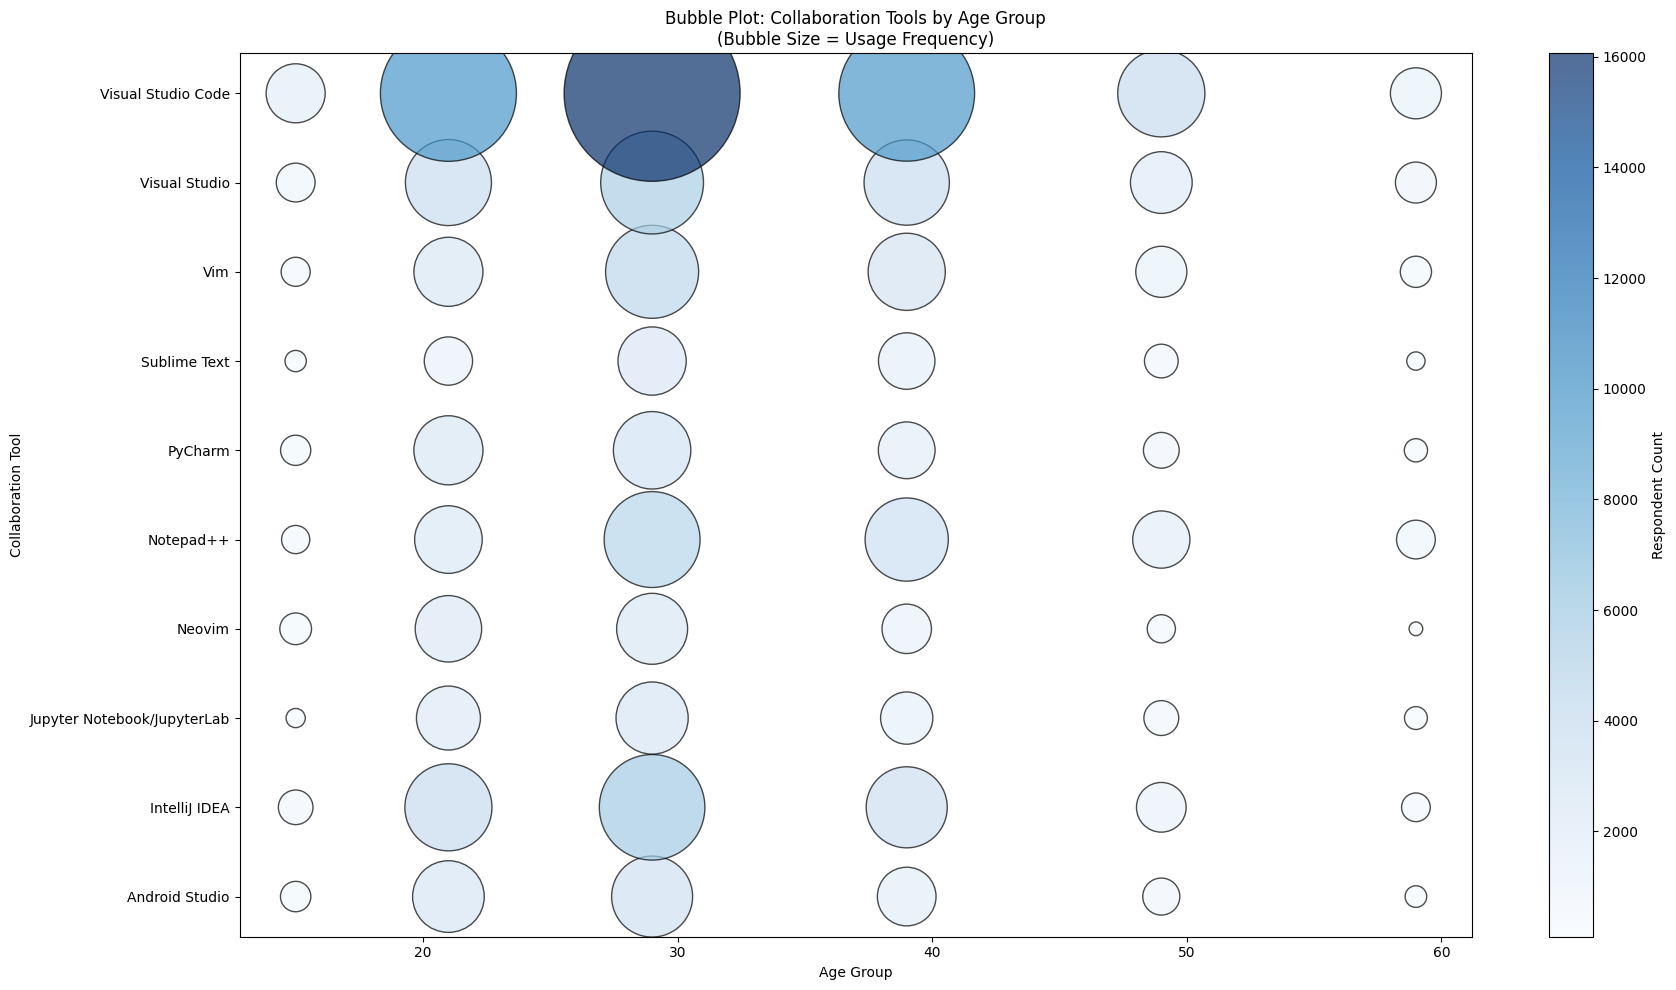

In [60]:
##Write your code here
def map_age_range(age_str):
    if pd.isnull(age_str):
        return None
    elif 'Under 18' in age_str:
        return 15
    elif '18-24' in age_str:
        return 21
    elif '25-34' in age_str:
        return 29
    elif '35-44' in age_str:
        return 39
    elif '45-54' in age_str:
        return 49
    elif '55-64' in age_str:
        return 59
    elif '65 or older' in age_str or '65+' in age_str:
        return 67
    else:
        return None

df['AgeNumeric'] = df['Age'].apply(map_age_range)

df_tools = df.dropna(subset=['NEWCollabToolsHaveWorkedWith', 'AgeNumeric']).copy()
df_tools['Tool'] = df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_tools = df_tools.explode('Tool')
df_tools['Tool'] = df_tools['Tool'].str.strip()

tool_age_counts = (df_tools.groupby(['AgeNumeric', 'Tool']).size().reset_index(name='Count'))

"""# (Optional) Show only the top 10 tools for clarity
top_tools = tool_age_counts.groupby('Tool')['Count'].sum().nlargest(10).index
tool_age_counts = tool_age_counts[tool_age_counts['Tool'].isin(top_tools)]"""


# Order age groups for display
#age_order = ['Under 18','18-24','25-34','35-44','45-54','55-64','65+']

plt.figure(figsize=(18, 10))
scatter = plt.scatter(
    x=tool_age_counts['AgeNumeric'],
    y=tool_age_counts['Tool'],
    s=tool_age_counts['Count'],  # Adjust bubble size as preferred
    c=tool_age_counts['Count'],
    cmap='Blues',
    alpha=0.7,
    edgecolors='k'
)

#plt.xticks(ticks=range(len(age_order)), labels=age_order)
plt.xlabel('Age Group')
plt.ylabel('Collaboration Tool')
plt.title('Bubble Plot: Collaboration Tools by Age Group\n(Bubble Size = Usage Frequency)')
plt.colorbar(scatter, label='Respondent Count')
plt.tight_layout()
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



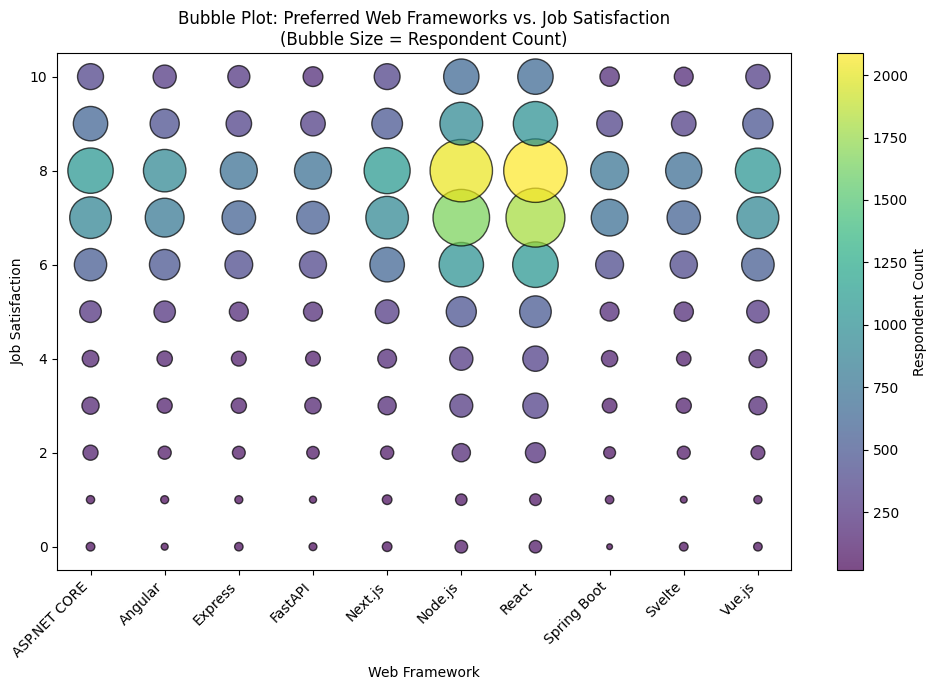

In [13]:
##Write your code here
df_web = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat']).copy()
df_web['WebFramework'] = df_web['WebframeWantToWorkWith'].str.split(';')
df_web = df_web.explode('WebFramework')
df_web['WebFramework'] = df_web['WebFramework'].str.strip()

wf_js_counts = (df_web.groupby(['WebFramework', 'JobSat']).size().reset_index(name='Count'))

top_frameworks = wf_js_counts.groupby('WebFramework')['Count'].sum().nlargest(10).index
wf_js_counts = wf_js_counts[wf_js_counts['WebFramework'].isin(top_frameworks)]

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    x=wf_js_counts['WebFramework'],
    y=wf_js_counts['JobSat'],
    s=wf_js_counts['Count'] ,
    c=wf_js_counts['Count'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='k'
)

plt.xlabel('Web Framework')
plt.ylabel('Job Satisfaction')
plt.title('Bubble Plot: Preferred Web Frameworks vs. Job Satisfaction\n(Bubble Size = Respondent Count)')
plt.colorbar(scatter, label='Respondent Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



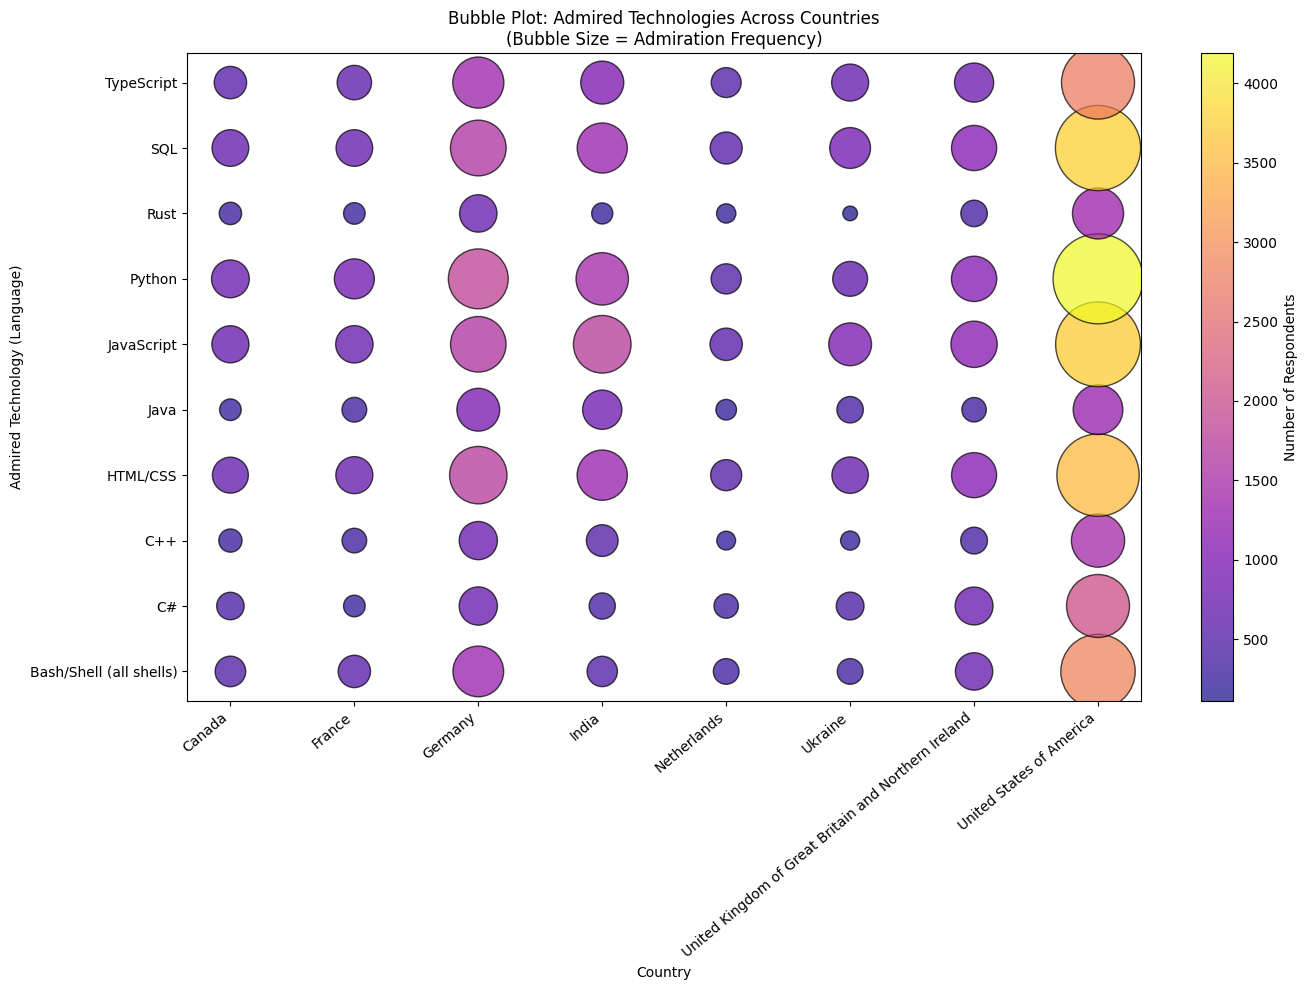

In [18]:
##Write your code here
df_admired = df.dropna(subset=['Country', 'LanguageAdmired']).copy()

df_admired['Language'] = df_admired['LanguageAdmired'].str.split(';')
df_admired = df_admired.explode('Language')
df_admired['Language'] = df_admired['Language'].str.strip()

admired_counts = (df_admired.groupby(['Country', 'Language']).size().reset_index(name='Count'))


top_countries = admired_counts.groupby('Country')['Count'].sum().nlargest(8).index
top_languages = admired_counts.groupby('Language')['Count'].sum().nlargest(10).index
plot_df = admired_counts[admired_counts['Country'].isin(top_countries) & admired_counts['Language'].isin(top_languages)
]


plt.figure(figsize=(14, 10))
scatter = plt.scatter(
    x=plot_df['Country'],
    y=plot_df['Language'],
    s=plot_df['Count'] , 
    c=plot_df['Count'],
    cmap='plasma',
    alpha=0.7,
    edgecolors='k'
)

plt.xlabel('Country')
plt.ylabel('Admired Technology (Language)')
plt.title('Bubble Plot: Admired Technologies Across Countries\n(Bubble Size = Admiration Frequency)')
plt.colorbar(scatter, label='Number of Respondents')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
